In [3]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the dataset

df = pd.read_csv("C://Users//91772//Desktop//ML assigns//House_Rent_Dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/91772/Desktop/ML assigns/House_Rent_Dataset.csv'

In [ ]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
#it gives information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
#it gives number of column and rows
df.shape

(4746, 12)

# 1.Pre-process the dataset.

In [ ]:
#it gives the number of sum of null values in column
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [ ]:
df.drop(labels='Posted On',axis=1,inplace=True)
df.drop(labels='Point of Contact',axis=1,inplace=True)
df.drop(labels='City',axis=1,inplace=True)
df.drop(labels='Floor',axis=1,inplace=True)

In [ ]:
df.head()

,BHK,Rent,Size,Area Type,Area Locality,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Bandel,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Dumdum Park,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,South Dum Dum,Unfurnished,Bachelors,1


In [ ]:
#it gives the datatype of each column
df.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Area Type            object
Area Locality        object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
dtype: object

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Area Locality']= label_encoder.fit_transform(df['Area Locality'])
df['Area Type']= label_encoder.fit_transform(df['Area Type'])
df['Furnishing Status']= label_encoder.fit_transform(df['Furnishing Status'])
df['Tenant Preferred']= label_encoder.fit_transform(df['Tenant Preferred'])

In [ ]:
df.dtypes

BHK                  int64
Rent                 int64
Size                 int64
Area Type            int32
Area Locality        int32
Furnishing Status    int32
Tenant Preferred     int32
Bathroom             int64
dtype: object

In [ ]:
#it gives statistical description of the dataset
df.describe()

,BHK,Rent,Size,Area Type,Area Locality,Furnishing Status,Tenant Preferred,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.514960,1091.711547,1.239149,0.924568,1.965866
std,0.832256,7.810641e+04,634.202328,0.500671,633.195921,0.684553,0.518366,0.884532
min,1.000000,1.200000e+03,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000,551.000000,1.000000,1.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000,1094.500000,1.000000,1.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000,1631.000000,2.000000,1.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,2.000000,2234.000000,2.000000,2.000000,10.000000


# 2. Identify outliers.

OUTLIER: An object that deviates significantly from the rest of the objects.

<AxesSubplot:xlabel='Rent', ylabel='Density'>

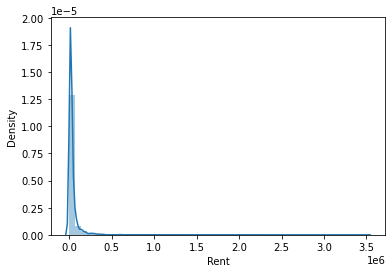

In [ ]:
# data visualization
# plotting distribution plot

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.distplot(df['Rent'])

<AxesSubplot:xlabel='BHK', ylabel='Density'>

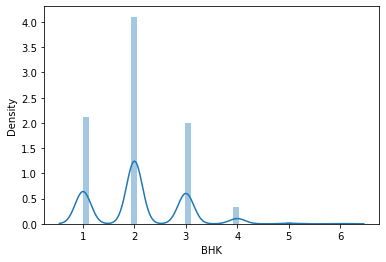

In [ ]:
sns.distplot(df['BHK'])

<AxesSubplot:xlabel='Size', ylabel='Density'>

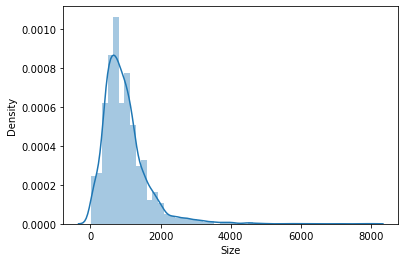

In [ ]:
sns.distplot(df['Size'])

<AxesSubplot:xlabel='Bathroom', ylabel='Density'>

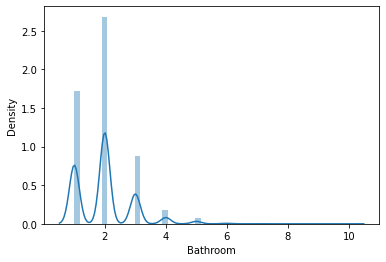

In [ ]:
sns.distplot(df['Bathroom'])

In [ ]:
#creating a function to identify outliers statistical way to find outliers

def find_outliers_IQR(df):
   q1 = df.quantile(0.25) #lower 
   q3 = df.quantile(0.75) #upper
   IQR = q3-q1 #Inter Quartile Range
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))] #it returns the outlier out of this range
   return outliers

In [ ]:
#getting outlier details for column "fair_amount" using the above function

outliers = find_outliers_IQR(df["Rent"])
print("number of outliers: "+ str(len(outliers))) 
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 520
max outlier value: 3500000
min outlier value: 68000


104     180000
525      70000
527      75000
530     160000
531     300000
         ...  
4523     70000
4543    200000
4648     80000
4669    140000
4716    110000
Name: Rent, Length: 520, dtype: int64

In [ ]:
#upper and lower limit which can be used for capping of outliers

upper_limit = df['Rent'].mean() + 3*df['Rent'].std()
print(upper_limit)
lower_limit = df['Rent'].mean() - 3*df['Rent'].std()
print(lower_limit)

269312.69013948005
-199325.78748461278


# 3. Check the correlation.

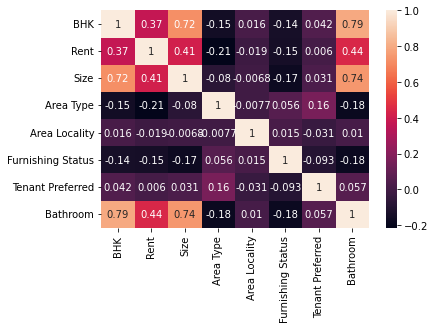

In [ ]:
#creating a correlation matrix
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True) #it shows how the columns are correlated with each other
plt.show()

In [ ]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split

In [ ]:
#independent variables (x)

x=df.drop("Rent", axis=1)
x

,BHK,Size,Area Type,Area Locality,Furnishing Status,Tenant Preferred,Bathroom
0,2,1100,2,221,2,1,2
1,2,800,2,1527,1,1,1
2,2,1000,2,1760,1,1,1
3,2,800,2,526,2,1,1
4,2,850,1,1890,2,0,1
...,...,...,...,...,...,...,...
4741,2,1000,1,219,1,1,2
4742,3,2000,2,1214,1,1,3
4743,3,1750,1,724,1,1,3
4744,3,1500,1,590,1,2,2


In [ ]:
#dependent variable (y)

y=df["Rent"]

In [ ]:
#split the dataset into training and testing (we have convert into 20% testing )
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
x_train.head()

,BHK,Size,Area Type,Area Locality,Furnishing Status,Tenant Preferred,Bathroom
3936,2,745,2,1748,2,1,2
749,3,1224,1,1298,2,2,3
3254,2,900,2,1035,1,1,2
3979,2,1000,2,1337,2,1,1
4487,2,1156,1,255,2,0,2


In [ ]:
x_test.head()

,BHK,Size,Area Type,Area Locality,Furnishing Status,Tenant Preferred,Bathroom
4501,3,1550,2,228,1,1,3
480,2,800,1,611,2,0,2
558,2,610,1,2219,0,1,2
1381,2,680,1,594,2,2,2
4744,3,1500,1,590,1,2,2


In [ ]:
y_train.head()

3936     12000
749     130000
3254     20000
3979     12000
4487      9000
Name: Rent, dtype: int64

In [ ]:
y_test.head()

4501    37000
480     10000
558     68000
1381    32000
4744    45000
Name: Rent, dtype: int64

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(3796, 7)
(950, 7)
(950,)
(3796,)


# 4. Implement linear regression and random forest regression models.
# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.


In [ ]:
#Linear Regression - used to find the relationship between dependent and independent variable

from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [ ]:
predictedvalues = lrmodel.predict(x_test) #model is predicted on x_test

In [ ]:
#Calculating the value of RMSE for Linear Regression
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 52935.878134010025


In [ ]:
#Random Forest Regression - It divide it into multiple classifiers/tree and combine the average of all the classifiers/tree
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [ ]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [ ]:
#Calculating the value of RMSE for Random Forest Regression

rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  71958.21333839449


In [ ]:
rfrmodel_pred.shape

(950,)

# Predict the price of the house


In [ ]:
#we have taken the new dataset as a input to test our trained model
test = pd.read_csv("C://Users//91772//Desktop//ML assigns//House_predict.csv")

In [ ]:
test.head()

,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1


In [ ]:
test.isnull().sum()

BHK                  0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
dtype: int64

In [ ]:
test['Area Locality']= label_encoder.fit_transform(test['Area Locality'])
test['Area Type']= label_encoder.fit_transform(test['Area Type'])
test['Furnishing Status']= label_encoder.fit_transform(test['Furnishing Status'])
test['Tenant Preferred']= label_encoder.fit_transform(test['Tenant Preferred'])

In [ ]:
test.dtypes

BHK                   int64
Size                  int64
Floor                object
Area Type             int32
Area Locality         int32
City                 object
Furnishing Status     int32
Tenant Preferred      int32
Bathroom              int64
dtype: object

In [ ]:
test.drop(labels='City',axis=1,inplace=True)
test.drop(labels='Floor',axis=1,inplace=True)

In [ ]:
#Prediction! we have predicted this model
rfrmodel_pred= rfrmodel.predict(test)

In [ ]:
df_pred = pd.DataFrame(rfrmodel_pred)
df_pred

,0
0,16295.000000
1,17440.000000
2,16945.000000
3,9870.000000
4,8076.000000
...,...
4741,23446.666667
4742,32990.000000
4743,35610.000000
4744,38160.000000


In [ ]:
#to_csv() function exports the DataFrame to CSV format

df_pred.to_csv('pred.csv')